## Задача 2. Сравнение методов классификации

**ФИО**: Степырев Даниил Федорович

**Номер группы**: 22.М05

**Выполненные пункты**:
- [ ] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [x] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [ ] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [ ] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [ ] \* (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [ ] \* (**+2 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

### Данные, на которых решается задача

В первой части задания используется датасет заболеваний сердца.

Описание датасета:
* **age** --- возраст (в годах); <br>
* **sex** --- пол (1 --- мужчина; 0 --- женщина); <br>
* **cp** --- тип боли в груди; <br>
* **trestbps** --- артериальное давление в покое (в мм рт.ст. при поступлении в стационар); <br>
* **chol** --- холестерин сыворотки в мг/дл; <br>
* **fbs** --- уровень сахара в крови (1 --- >120 мг/дл; 0 --- иначе); <br>
* **restecg** --- результаты электрокардиографии в покое; <br>
* **thalach** --- максимальная достигнутая частота сердечных сокращений; <br>
* **exang** --- стенокардия, вызванная физической нагрузкой (1 --- да; 0 --- нет); <br>
* **oldpeak** --- депрессия сегмента ST, вызванная физической нагрузкой, по сравнению с состоянием покоя; <br>
* **slope** --- наклон пикового сегмента ST при нагрузке; <br>
* **ca** --- количество крупных сосудов (0-3), окрашенных при флюороскопии; <br>
* **thal** --- 1 --- нормальный; 2 --- фиксированный дефект; 3 --- обратимый дефект; <br>
* **target** --- есть болезнь или нет (1 --- есть; 0 --- нет).

Решаем задачу классификации, предсказываем целевой признак **target** --- имеет ли пациент заболевание сердца.

### Считывание данных

Подключаем использумые библиотеки:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку:

In [2]:
df = pd.read_csv('Dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Общее количество пропущенных значений:

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Разведочный анализ (EDA)

Рассмотрим, сколько различных значений принимает целевой признак:

In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Построим график:

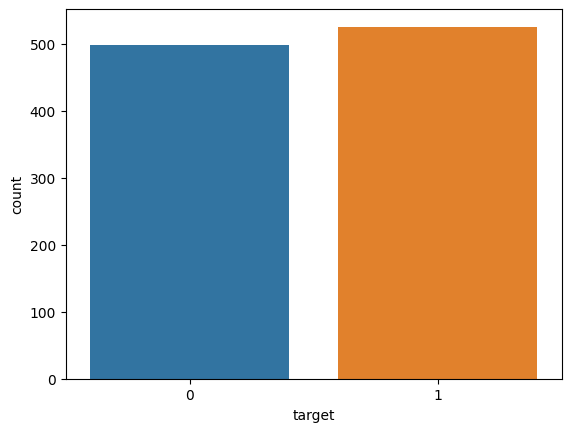

In [5]:
sns.countplot(x="target", data=df)
plt.show()

Видим, что в датасете чуть больше людей с заболеванием сердца.

### Количественный признак age

Выясним, какие значения принимает признак **age** в датасете:

In [6]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

Видим, что наимеьший возраст --- 29 лет, а самый большой --- 77. Среднее значение 54 года.

Построим график наличия сердечных заболеваний относительно возраста:

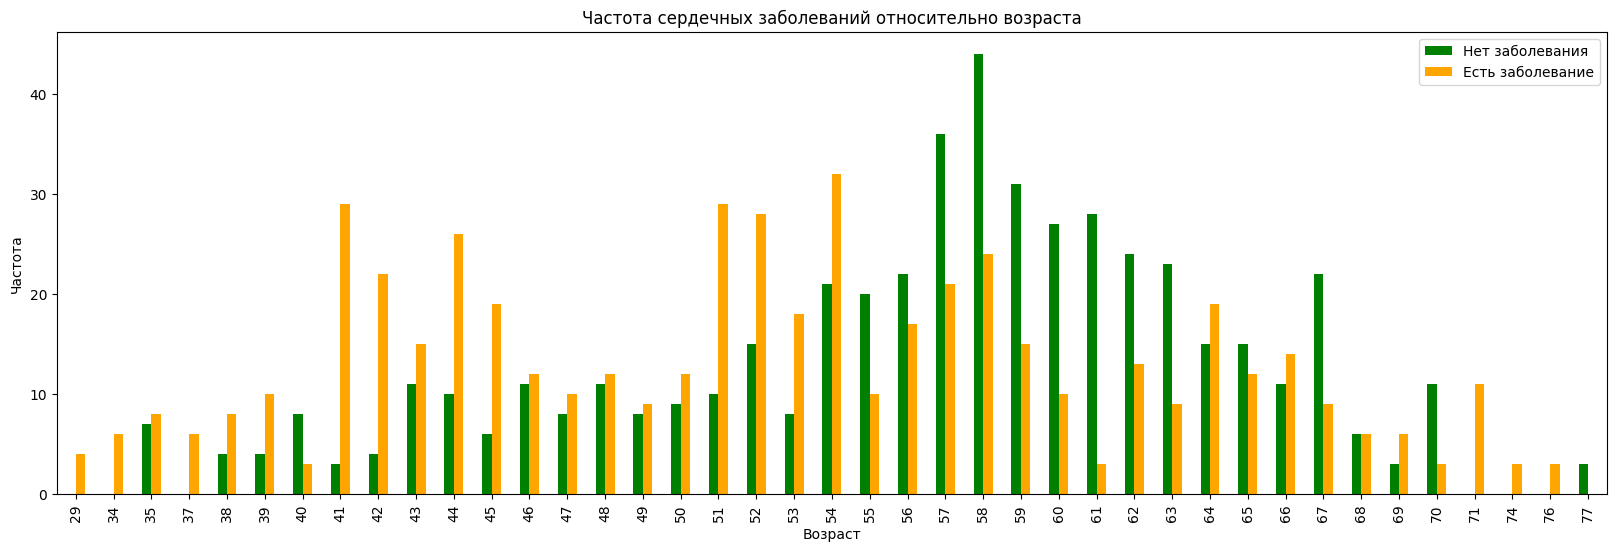

In [27]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Из графика видим, что у пациентов в возрасте от 29 до 54 и частота наличия сердечного заболевания выше, чем его отсутствие. У пациентов в возрасте от 55 до 67 (с двумя исключениями: 64 и 66 лет) преобладает отсутствие сердечного заболевания. Наибольшая частота сердечного заболевания у людей в возрасте 41, 51 b 54 года. Наименьшая --- у людей в возасте 57 и 58 лет.

Посмотрим, какой средний возраст у людей, обладающих и не обладающих сердечными заболеваниями:

In [29]:
df.groupby('target').mean()['age']

target
0    56.569138
1    52.408745
Name: age, dtype: float64

Видим, что средний возраст людей, не обладающих сердечными заболеваниями равен 56, а пациентов с сердечными заболеваниями --- 52.

### Дискретный признак sex

Выясним, какие значения принимает признак **sex** в датасете:

In [13]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

Видим, что в датасете мужчин более чем в два раза больше, чем женщин.

Построим график:

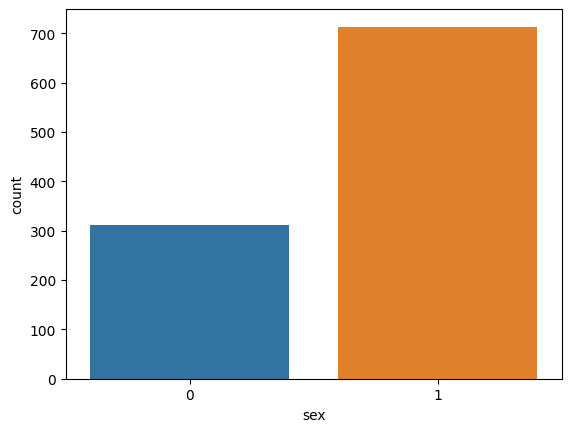

In [14]:
sns.countplot(x="sex", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно пола:

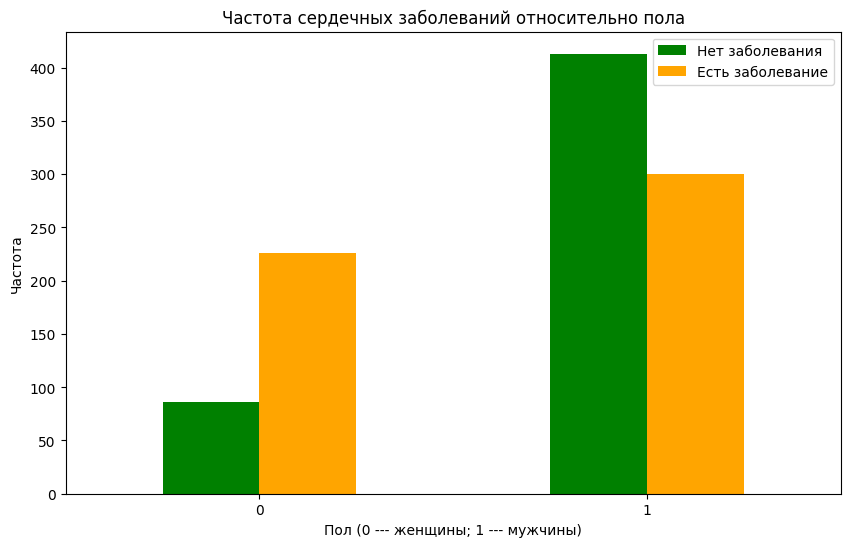

In [28]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.xticks(rotation=0)
plt.title('Частота сердечных заболеваний относительно пола')
plt.xlabel('Пол (0 --- женщины; 1 --- мужчины)')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что среду пациентов женщин более чем в два раза больше людей с заболеванием сердца, чем без него. Среди пациентов мужчин больше людей без заболевания сердца, чем с ним.

Посмотрим, сколько в среднем людей разного пола, обладающих и не обладающих сердечными заболеваниями:

In [33]:
df.groupby('sex').mean()['target']

sex
0    0.724359
1    0.420757
Name: target, dtype: float64

Видим, что 72 процента женщин и 42 процента мужчин в датасете обладают сердечными заболеваниями.

### Категориальный признак cp

Выясним, какие значения принимает признак **cp** в датасете:

In [34]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

Видим, что в датасете признак **cp** принимает 4 различных значения.

Построим график:

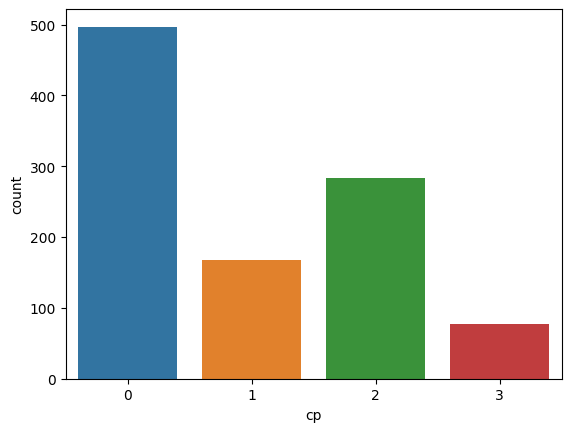

In [35]:
sns.countplot(x="cp", data=df)
plt.show()

Из графика видим, что самый частый тип боли в груди --- тип 0. Наименее частый --- тип 3.

Построим график наличия сердечных заболеваний относительно типа боли в груди:

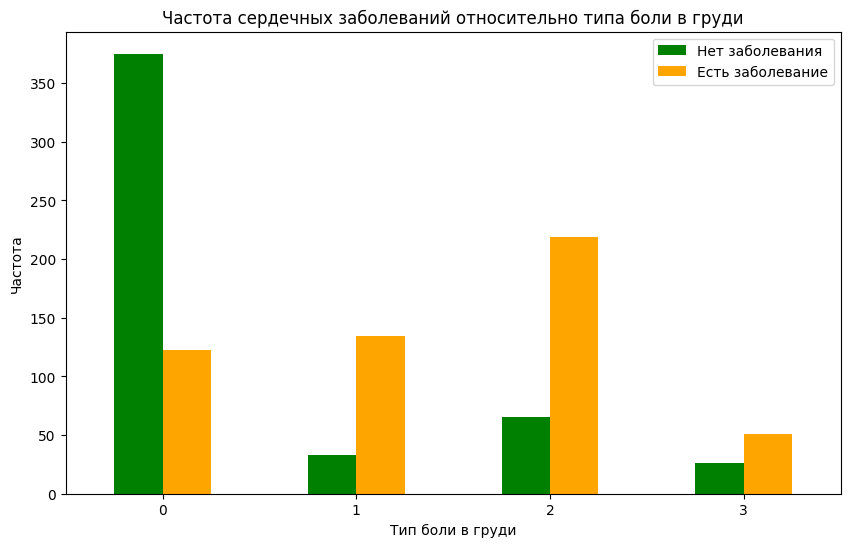

In [38]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.xticks(rotation=0)
plt.title('Частота сердечных заболеваний относительно типа боли в груди')
plt.xlabel('Тип боли в груди')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что у пациентов с типом боли 0 примерно в три раза больше людей без сердечных заболеваний. У остальных типов 1, 2 и 3 количество людей с сердечными заболеваниями больше, чем число пациентов без них. Наиболее высокая частота сердечных заболеваний у пациентов с типом боли 2, наименьшая --- у пациентов с типом боли 3.

Посмотрим, сколько в среднем людей с разным типом болей в груди обладает и не обладает сердечными заболеваниями:

In [39]:
df.groupby('cp').mean()['target']

cp
0    0.245473
1    0.802395
2    0.771127
3    0.662338
Name: target, dtype: float64

Видим, что только 24 процента пациентов с типом боли в груди 0 обладает сердечным заболеванием, у пациентов с типом боли груди 1 этот процент равен 80, у людей с типом боли 2 --- 77 процентов, у людей с типом боли 3 --- 66 процентов.

### Количественный признак trestbps

Выясним, какие значения принимает признак **trestbps** в датасете:

In [40]:
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

Видим, что наименьшее значение артериального давления равно 94, наивысшее 200, а среднее 131.

Построим график наличия сердечных заболеваний относительно артериального значения:

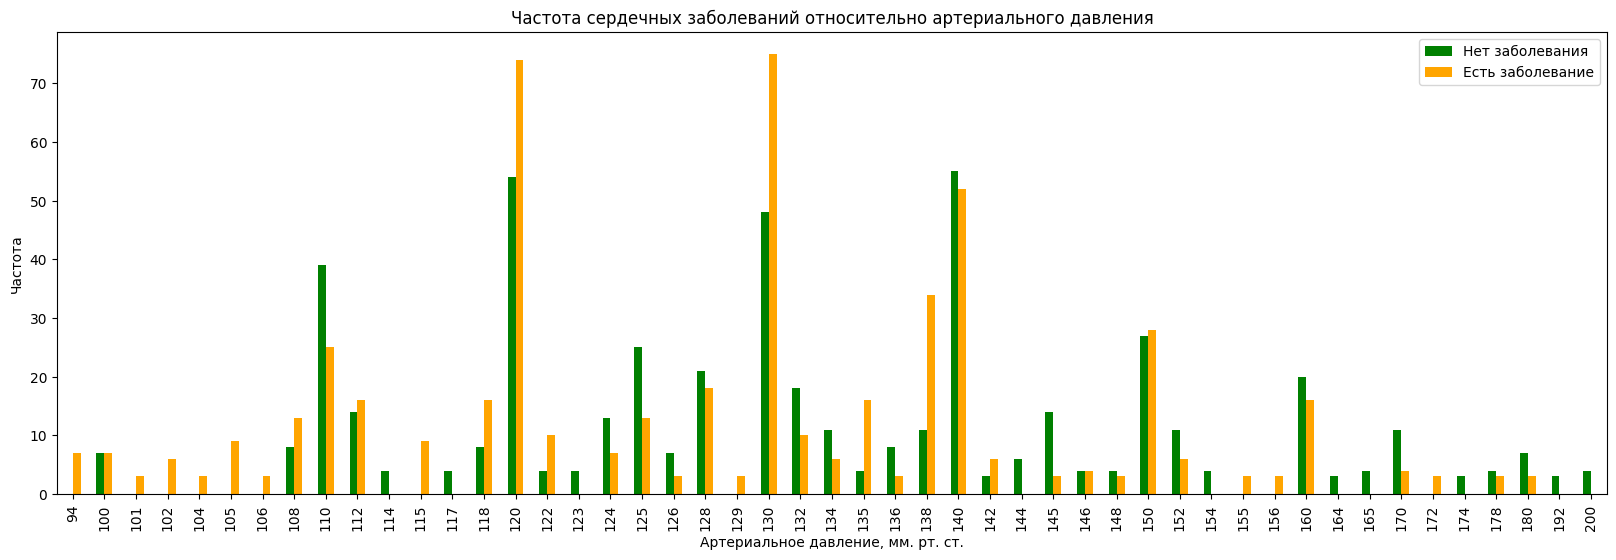

In [42]:
pd.crosstab(df.trestbps, df.target).plot(kind="bar", figsize=(20, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно артериального давления')
plt.xlabel('Артериальное давление, мм. рт. ст.')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Из графика видим, что у пациентов с артериальным давлением ниже 123 мм. рт. ст. (за исключением 110) преобладает число людей с сердечными заболеваниями. Число людей, не обладающих сердечными заболеваниями, наивысшее у пациентов с артериальным давлением выше 156, а ткже от 123 до 128 мм. рт. ст. Наиболее частый случай пациентов с сердечным заболеванием у людей с артериальным давлением 120 и 130 мм. рт. ст.

Посмотрим, какое давление в среднем у людей, обладающих и не обладающих сердечными заболеваниями:

In [44]:
df.groupby('target').mean()['trestbps']

target
0    134.106212
1    129.245247
Name: trestbps, dtype: float64

Видим, что среднее артериальное давление у людей без сердечных заболеваний равно 134 мм. рт. ст., у пациентов с сердечными заболеваниями --- 129 мм. рт. ст.

### Количественный признак chol

Выясним, какие значения принимает признак **chol** в датасете:

In [45]:
df['chol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

Видим, что наименьшее значения холестерина сыворотки равно 126 мг/дл, наивысшее --- 564 мг/дл, среднее --- 246 мг/дл.

Построим график наличия сердечных заболеваний относительно значений холестерина сывортки:

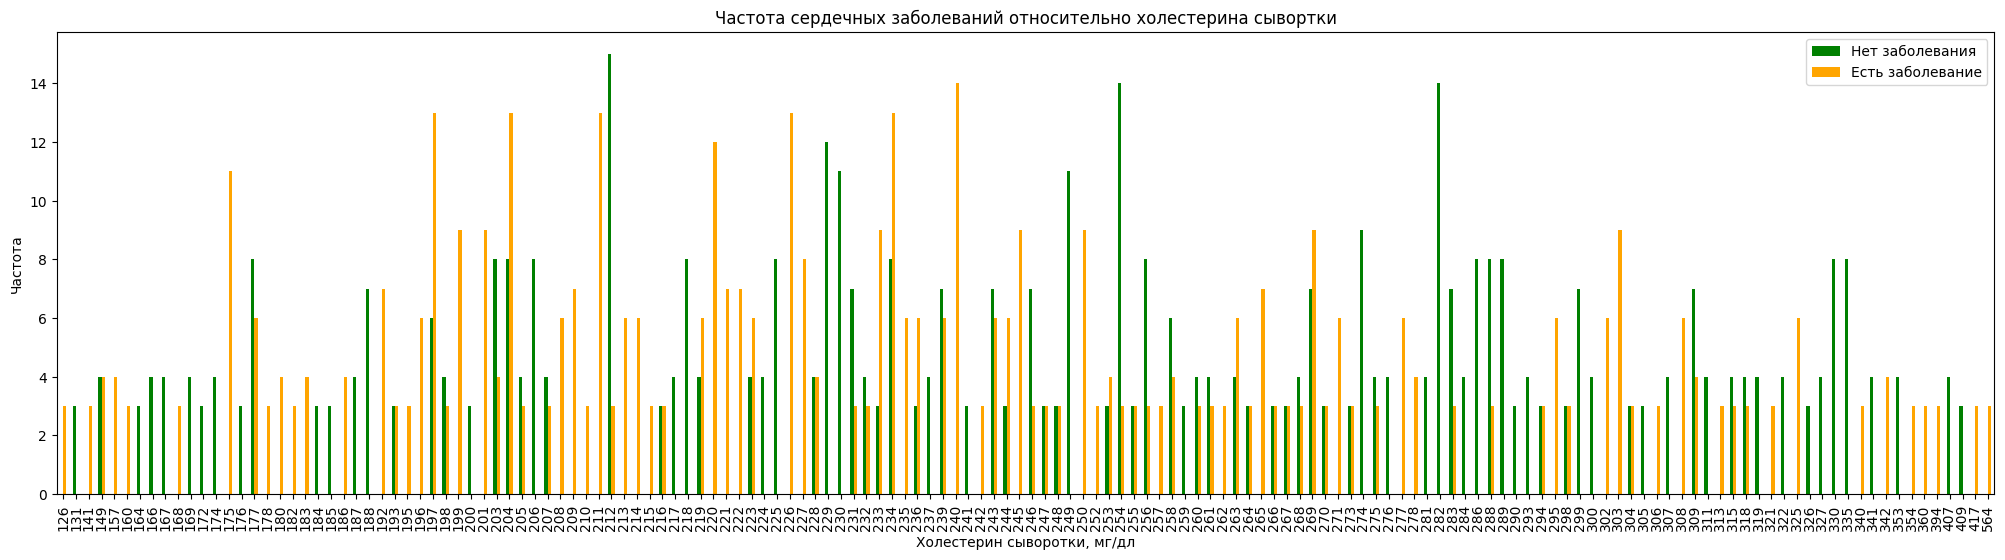

In [47]:
pd.crosstab(df.chol, df.target).plot(kind="bar", figsize=(25, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно холестерина сывортки')
plt.xlabel('Холестерин сыворотки, мг/дл')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что у людей с холестерином сыворотки ниже 245 мг/дл преобладает число пациентов с сердечными заболеваниями. У пациентов с холестерином сыворотки выше 308 мг/дл преобладает число людей без сердечных заболеваний. Наиболее частое значение холестерина сывортки у людей без сердечных заболеваний равно 212, 254 и 282 мг/дл. Наиболее частое значение холестерина сывортки у людей, обладающих сердечными заболевания равно 204, 234 и 240 мг/дл.

Посмотрим, какое среднее значения холестерина сывортки у людей, обладающих и не обладающих сердечными заболеваниями:

In [48]:
df.groupby('target').mean()['chol']

target
0    251.292585
1    240.979087
Name: chol, dtype: float64

Среднее значение холестерина сывортки у людей без сердечных заболеваний равно 251 мг/дл, у пациентов с сердечными заболеваниями --- 241 мг/дл.

### Дискретный признак fbs

Выясним, какие значения принимает признак **fbs** в датасете:

In [51]:
df.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

Видим, что более чем в 5 раз пациентов с уровнем сахара в крови ниже 120 мг/дл.

Построим график:

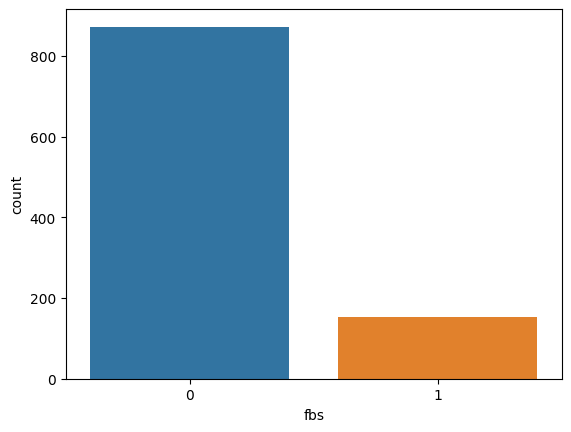

In [52]:
sns.countplot(x="fbs", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно уровня сахара в крови:

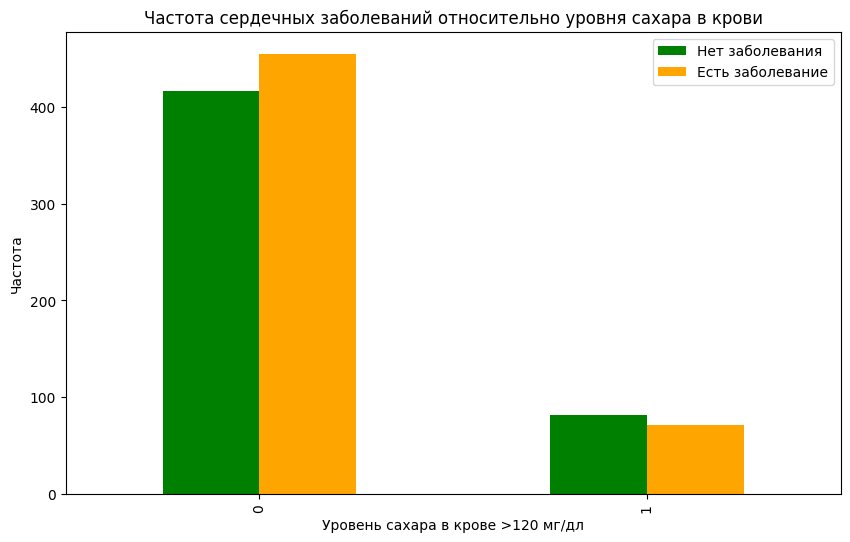

In [55]:
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно уровня сахара в крови')
plt.xlabel('Уровень сахара в крове >120 мг/дл')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что у людей с уровнем сахара в крови ниже 120 мг/дл преобладает число пациентов с сердечными заболеваниями, а у пациентов с уровнем сахара выше 120 мг/дл --- число людей без сердечных заболеваний. Также видим, что в датасете больше пациентов с уровнем сахара в крови ниже 120 мг/дл.

Посмотрим, сколько в среднем людей с разным уровнем сахара в крови обладает и не обладает сердечными заболеваниями:

In [56]:
df.groupby('fbs').mean()['target']

fbs
0    0.521789
1    0.464052
Name: target, dtype: float64

Видим, что у людей с уровнем сахара в крови ниже 120 мг/дл 52 процента пациентов имеют сердечные заболевания. У людей с уровнем сахара в крови выше 120 мг/дл 46 процентов пациентов обладает сердечными заболеваниями.

### Категориальный признак restecg

Выясним, какие значения принимает признак **restecg** в датасете:

In [57]:
df.restecg.value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

Видим, что наиболее частый результаты электрокардии --- тип 1, наименее частые --- тип 2.

Построим график:

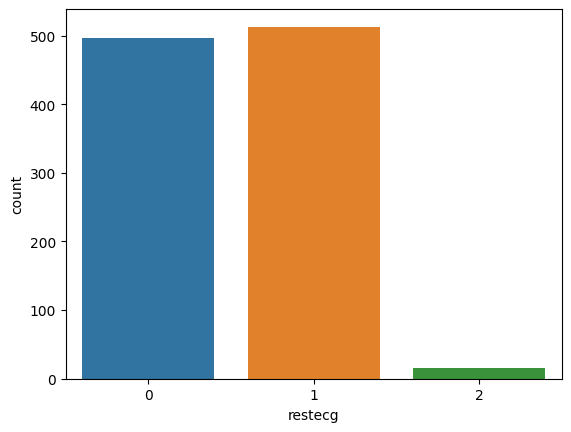

In [58]:
sns.countplot(x="restecg", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно типа электрокардии:

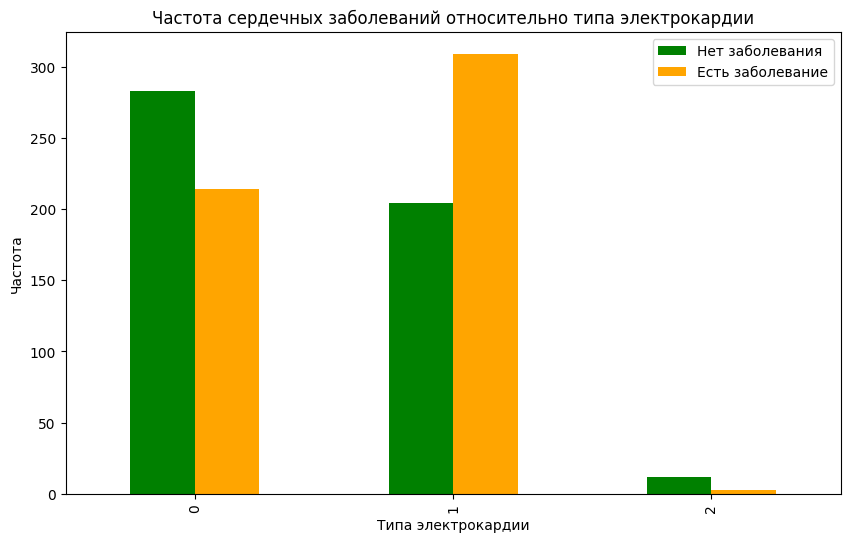

In [59]:
pd.crosstab(df.restecg, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно типа электрокардии')
plt.xlabel('Тип электрокардии')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что у людей с типом электрокардии 0 и 2 преобладает число людей без сердечных заболеваний. У пациентов с типом электрокардии 1 преобладает число людей с сердечными заболеваниями.

Посмотрим, сколько в среднем людей с разным типом электрокардии обладает и не обладает сердечными заболеваниями:

In [60]:
df.groupby('restecg').mean()['target']

restecg
0    0.430584
1    0.602339
2    0.200000
Name: target, dtype: float64

Видим, что у людей с типом электрокардии 0 43 процента людей обладает сердечными заболеваниями, у пациентом с типом 1 --- 60 процентов, у людей с типом 2 --- 20 процентов.

### Количественный признак thalach

Выясним, какие значения принимает признак **thalach** в датасете:

In [61]:
df['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

Видим, что наименьшее значения максимальной частоты сердечных сокращений равно 71, наивысшее --- 202, среднее --- 149.

Построим график наличия сердечных заболеваний относительно значений максимальной частоты сердечных сокращений:

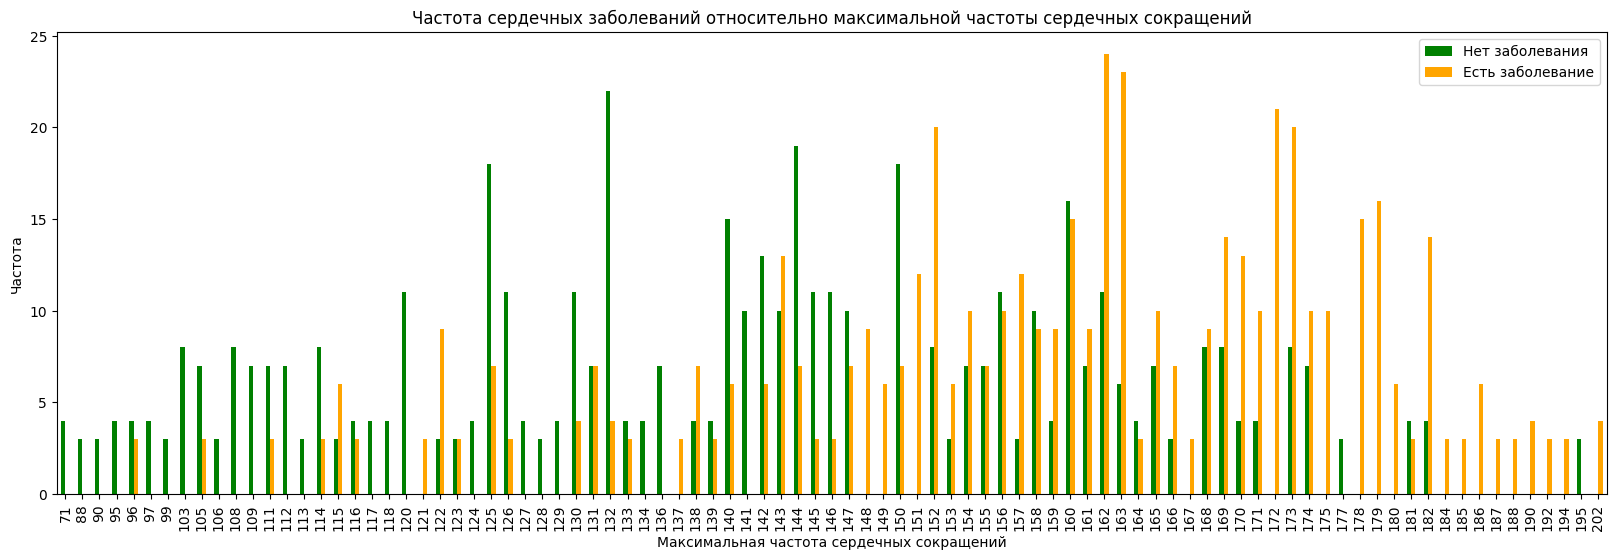

In [63]:
pd.crosstab(df.thalach, df.target).plot(kind="bar", figsize=(20, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно максимальной частоты сердечных сокращений')
plt.xlabel('Максимальная частота сердечных сокращений')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что у людей с максимальной частоты сердечных сокращений ниже 150 преобладает число людей без сердечных заболеваний. У пациентов с максимальной частоты сердечных сокращений выше 150 преобладает число людей с сердечными заболеваниями.

Посмотрим, какое среднее значения максимальной частоты сердечных сокращений у людей, обладающих и не обладающих сердечными заболеваниями:

In [64]:
df.groupby('target').mean()['thalach']

target
0    139.130261
1    158.585551
Name: thalach, dtype: float64

Видим, что среднее значение максимальной частоты сердечных сокращений у людей, не обладающих сердечными заболеваниями равно 139, а у пациентов с сердечными заболеваниями --- 159.

### Дискретный признак exang

Выясним, какие значения принимает признак **exang** в датасете:

In [65]:
df.exang.value_counts()

0    680
1    345
Name: exang, dtype: int64

Видим, что число людей без стенокардии почти в два раза больше, чем обладающих стенокардией.

Построим график:

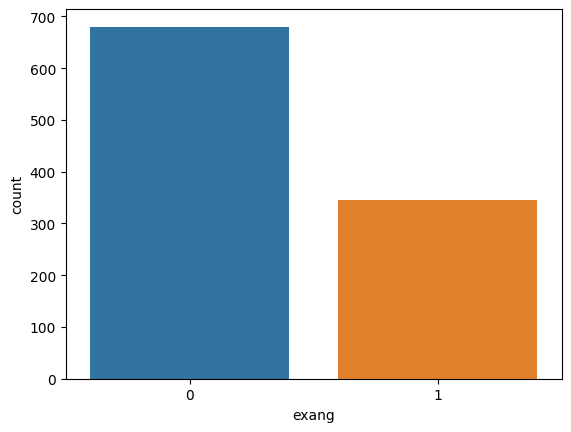

In [66]:
sns.countplot(x="exang", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно наличия стенокардии:

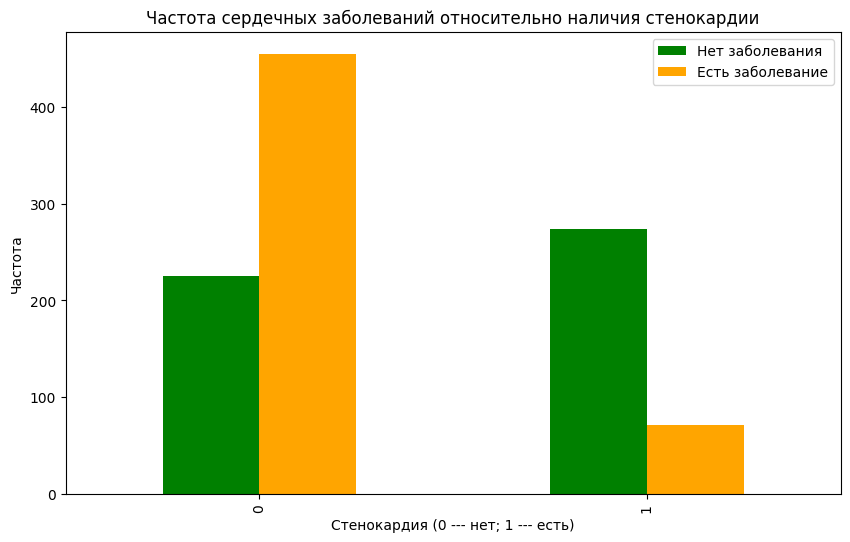

In [68]:
pd.crosstab(df.exang, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно наличия стенокардии')
plt.xlabel('Стенокардия (0 --- нет; 1 --- есть)')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что у людей, не обладающих стенокардией, почти в два раза больше людей с сердечными заболеваниями. У пациентов со стенокардией число людей без сердечных заболеваний более чем в три раза больше, чем обладающих ими.

Посмотрим, сколько в среднем людей со стенокардией и без обладает и не обладает сердечными заболеваниями:

In [69]:
df.groupby('exang').mean()['target']

exang
0    0.669118
1    0.205797
Name: target, dtype: float64

Видим, что у людей без стенокардии 67 процентов обладают сердечными заболеваниями. У пациентов со стенокардией только 21 процент обладает сердечными заболеваниями.

### Признак oldpeak

Выясним, какие значения принимает признак **oldpeak** в датасете:

In [70]:
df.oldpeak.describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

Видим, что наименьшее значения депрессии сегмента ST равно 0.00, наивысшее --- 6.20, среднее --- 1.07.

Построим график наличия сердечных заболеваний относительно значений депрессии сегмента ST:

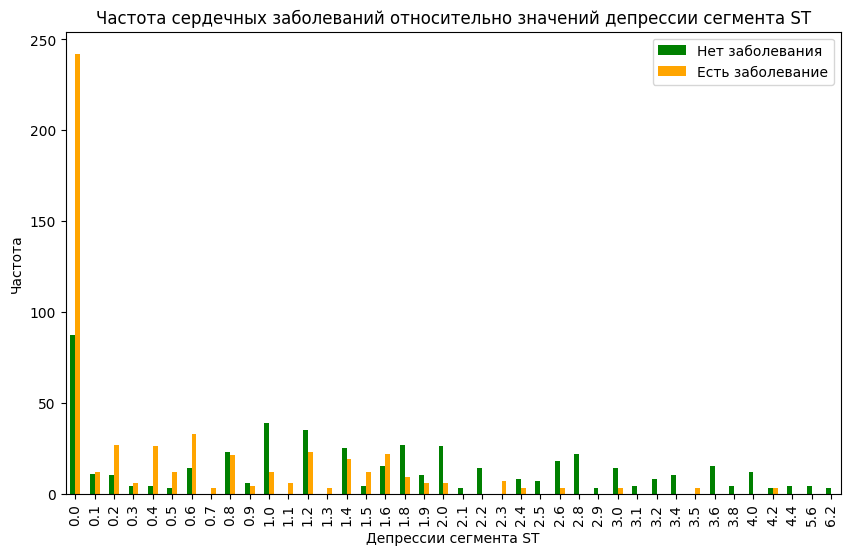

In [74]:
pd.crosstab(df.oldpeak, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно значений депрессии сегмента ST')
plt.xlabel('Депрессии сегмента ST')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что наибольшее значение людей с сердечными заболеваниями обладает депрессией сегмента ST равной 0.0. У людей с депрессией сегмента ST ниже 0.8 преобладает число пациентов с сердечными заболеваниями. У людей с депрессией сегмента ST выше 0.7 преобладает число пациентов без сердечных заболеваний.

Посмотрим, какое среднее значение депрессией сегмента ST у людей, обладающих и не обладающих сердечными заболеваниями:

In [75]:
df.groupby('target').mean()['oldpeak']

target
0    1.600200
1    0.569962
Name: oldpeak, dtype: float64

Видим, что среднее значение депрессией сегмента ST у людей, не обладающих сердечными заболеваниями равно 1.6, а у пациентов с сердечными заболеваниями --- 0.5.

### Категориальный признак slope

Выясним, какие значения принимает признак **slope** в датасете:

In [76]:
df.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

Видим, что в датасете больше всего людей с типом пикового сегмента ST 1, меньше всего --- с типом 0.

Построим график:

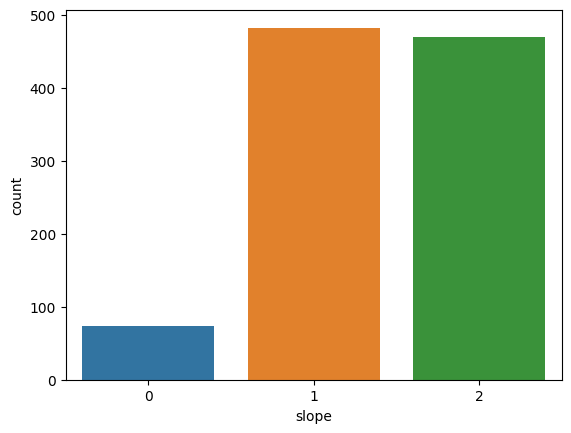

In [77]:
sns.countplot(x="slope", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно типа пикового сегмента ST:

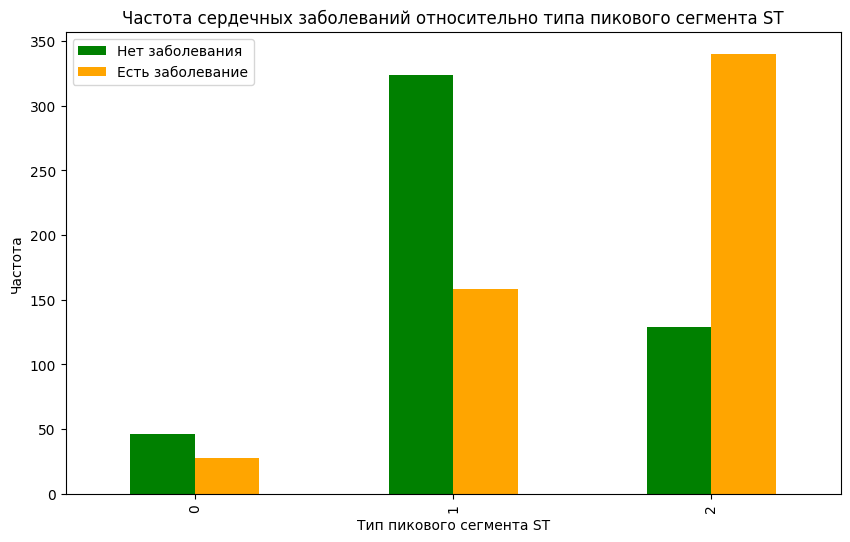

In [78]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно типа пикового сегмента ST')
plt.xlabel('Тип пикового сегмента ST')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что у людей с типом пикового сегмента ST 0 и 1 преобладает число людей без сердечных заболеваний. У людей с типом пикового сегмента ST 2 преобладает число пациентов, обладающих сердечными заболеваниями.

Посмотрим, сколько в среднем людей с различными типами пикового сегмета ST обладает и не обладает сердечными заболеваниями:

In [79]:
df.groupby('slope').mean()['target']

slope
0    0.378378
1    0.327801
2    0.724947
Name: target, dtype: float64

Видим, что 38 процентов людей с типом пикового сегмента 0 обладает сердечными заболеваниями, 33 процента пациентов с типом пикового сегмента 1 обладает сердечными заболеваниями, 72 процента пациентов с типом пикового сегмента 2 обладает сердечными заболеваниями.

### Категориальный признак ca

Выясним, какие значения принимает признак **ca** в датасете:

In [80]:
df.ca.value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

Видим, что в датасете больше всего людей с 0 крупных сосудов, меньше всего --- с 4.

Построим график:

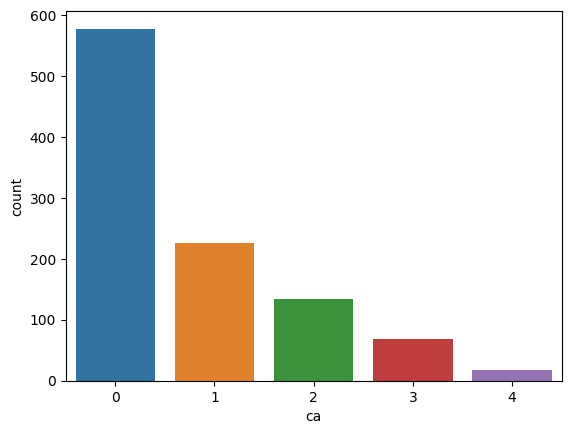

In [81]:
sns.countplot(x="ca", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно числа крупных сосудов:

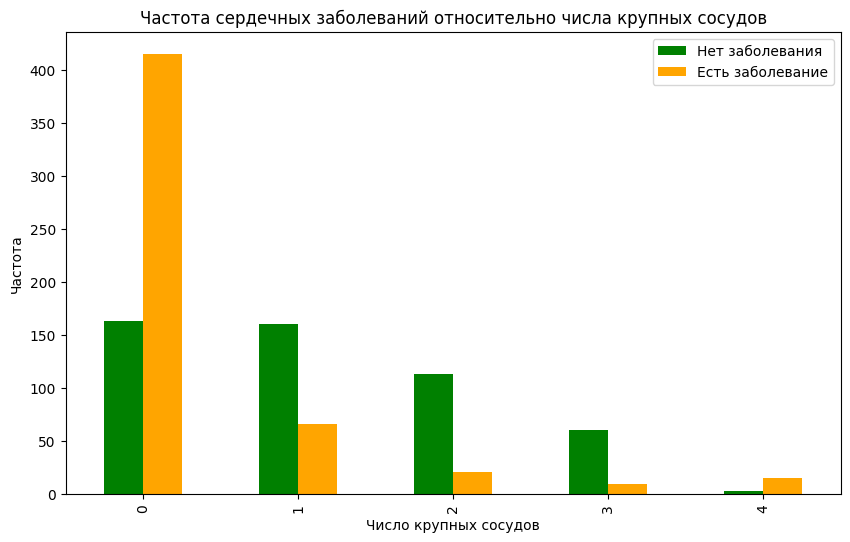

In [82]:
pd.crosstab(df.ca, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно числа крупных сосудов')
plt.xlabel('Число крупных сосудов')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что среди людей с числом крупных сосудов 0 и 4 преобладает число пациентов с сердечными заболеваниями. Среди пациентов с 1, 2 и 3 крупными сосудами преобладает число людей без сердечных заболевания. Болше всего в датасете людей с 0 крупных сосудов.

Посмотрим, сколько в среднем людей с различным числом крупных сосудов обладает и не обладает сердечными заболеваниями:

In [83]:
df.groupby('ca').mean()['target']

ca
0    0.717993
1    0.292035
2    0.156716
3    0.130435
4    0.833333
Name: target, dtype: float64

Видим, что среди людей с 0 крупных сосудов 72 процента обладают сердечными заболеваниями. Среди людей с 1 крупным сосудом 29 процентов обладают сердечными заболеваниями. Среди людей с 2 крупными сосудами 16 процентов обладают сердечными заболеваниями. Среди людей с 3 крупными сосудами 13 процентов обладают сердечными заболеваниями. Среди людей с 4 крупными сосудами 83 процента обладают сердечными заболеваниями.

### Категориальный призак thal

Выясним, какие значения принимает признак **thal** в датасете:

In [84]:
df.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

Видим, что в датасете больше всего людей с типом thal 2, меньше всего --- с типом tal 0.

Построим график:

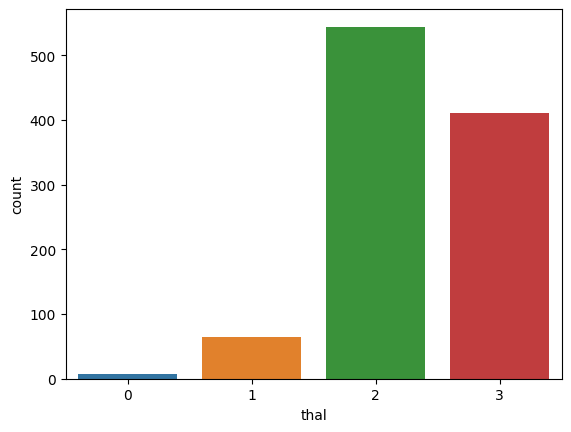

In [85]:
sns.countplot(x="thal", data=df)
plt.show()

Построим график наличия сердечных заболеваний относительно типа thal:

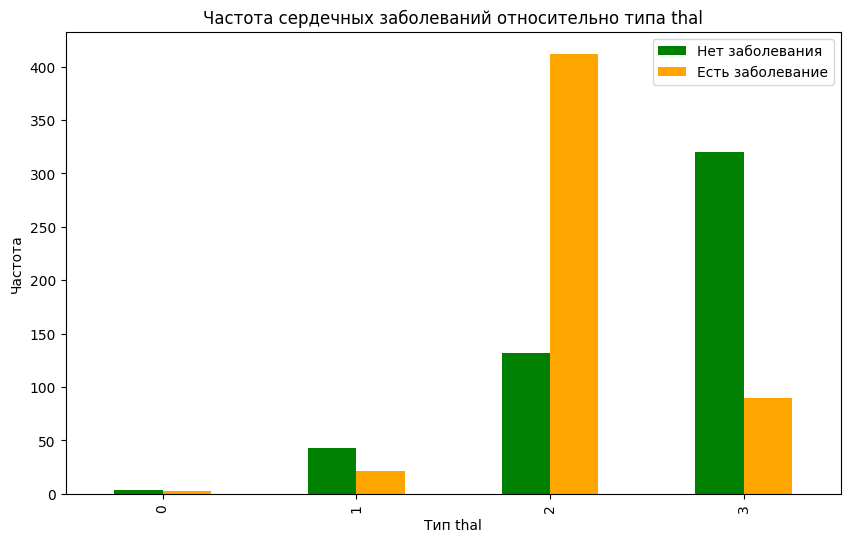

In [86]:
pd.crosstab(df.thal, df.target).plot(kind="bar", figsize=(10, 6), color=['green','orange'])
plt.title('Частота сердечных заболеваний относительно типа thal')
plt.xlabel('Тип thal')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

Видим, что среди людей с 0, 1 и 3 типом thal преобладает число пациентов без сердечных заболеваний. Среди людей с типом thal 2 больше людей с сердечными заболеваниями, чем без них.

Посмотрим, сколько в среднем людей с типом thal обладает и не обладает сердечными заболеваниями:

In [87]:
df.groupby('thal').mean()['target']

thal
0    0.428571
1    0.328125
2    0.757353
3    0.219512
Name: target, dtype: float64

Видим, что среди людей с 0 типом thal 43 процента обладают сердечными заболеваниями. Видим, что среди людей с 1 типом thal 33 процента обладают сердечными заболеваниями. Видим, что среди людей с 2 типом thal 76 процентов обладают сердечными заболеваниями. Видим, что среди людей с 3 типом thal 22 процента обладают сердечными заболеваниями.